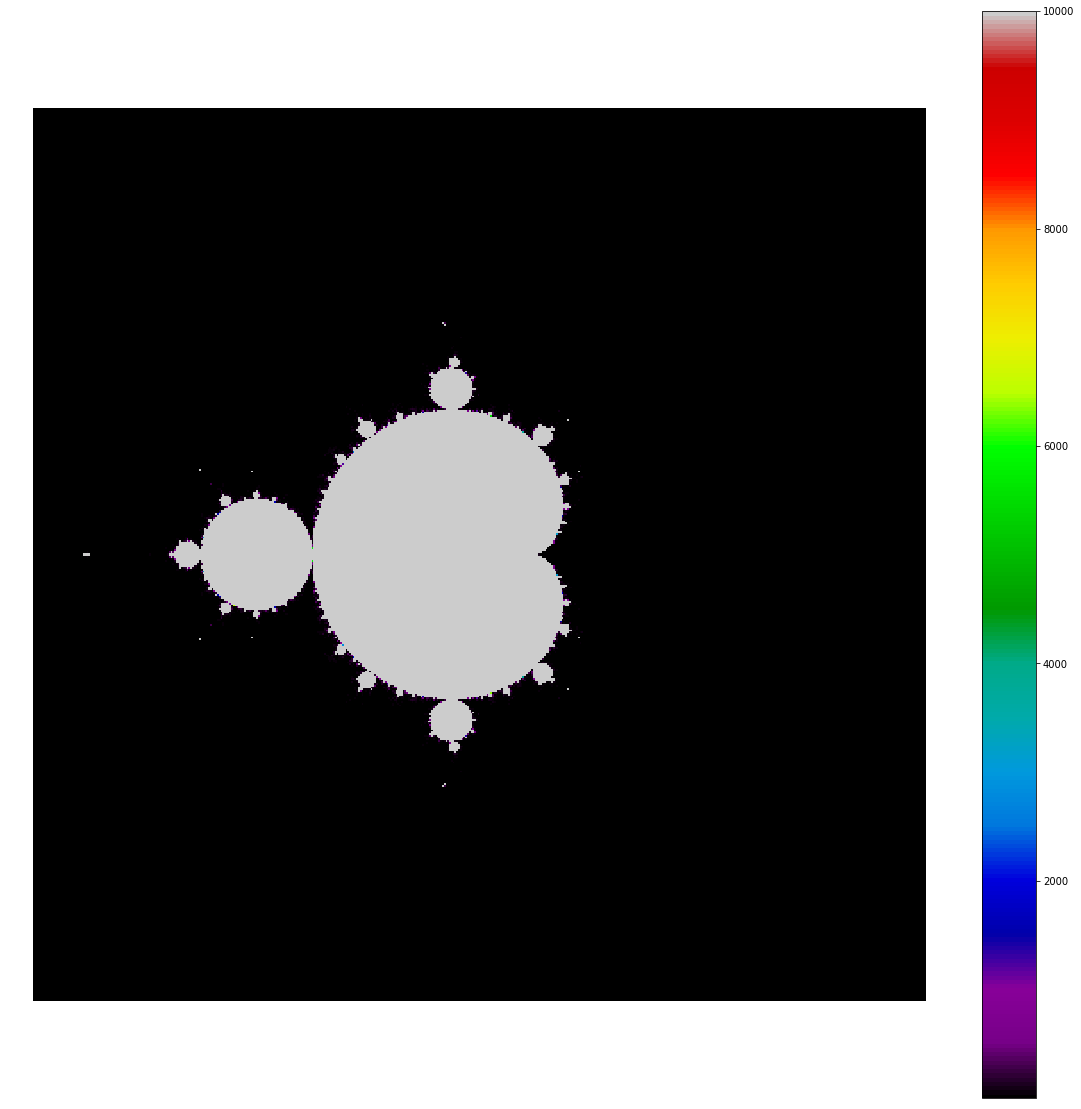

5.275816917419434


In [14]:
#Trevor Taylor
#The purpose of this program is to create an image of the mandelbrot set
#The colors determine on which iteration a number escapes and becomes greater than 2
#Note that the values which have the highest n, in this case they are white, are those in the mandelbrot set

import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from numba import jit
import time

t1 = time.time()
#Defines the resolution of the image
N = 500

#Mandelbrot set calculation
#Changes the values of 0 and 0j in z for different julia sets

@jit
def Mandelbrot(c):
    z = 0.0 + 0.0*1j
    n = 0
    while abs(z) <= 2 and n < 10000:
        z = z**2 + c
        n += 1
    return n
        

#Defines the range of each axis
x = np.linspace(-2,2,N)
y = np.linspace(-2,2,N)

#Empty array for Mandelbrot set
Mandelbrot_set = np.empty([N,N])

#for loops over i and j
for i , j in product(range(N) , range(N)):
    Mandelbrot_set[i,j] = Mandelbrot(x[j] + y[i]*1j)
    
#settings to plot mandelbrot set
plt.figure(figsize = (20 , 20))
plt.axis('off')
plt.nipy_spectral()
plt.imshow(Mandelbrot_set)
plt.colorbar()
plt.show()

#timing feature to find out the adverage loop time
t2 = time.time()
print(t2-t1)

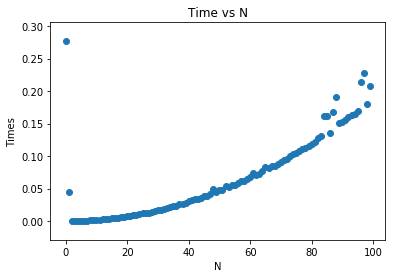

In [15]:
#Times for Mandelbrot set

import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from numba import jit
import time

#Defines the resolution of the image
#N = 1000

#Mandelbrot set calculation
#Changes the values of 0 and 0j in z for different julia sets

@jit
def Mandelbrot(c):
    z = 0.0 + 0.0*1j
    n = 0
    while abs(z) <= 2 and n < 10000:
        z = z**2 + c
        n += 1
    return n
        
@jit
def Mandelbrot_time(N):
#Defines the range of each axis
    x = np.linspace(-2,2,N)
    y = np.linspace(-2,2,N)

    #Empty array for Mandelbrot set
    Mandelbrot_set = np.empty([N,N])

    #for loops over i and j
    for i , j in product(range(N) , range(N)):
        Mandelbrot_set[i,j] = Mandelbrot(x[j] + y[i]*1j)
        
N = range(0,100)
times = []
for n in N:
    t1 = time.time()
    Mandelbrot_time(n)
    t2 = time.time()
    times.append(t2-t1)
    
plt.xlabel('N')
plt.ylabel('Times')
plt.title('Time vs N')
plt.scatter(N, times)
plt.show()